In [1]:
import hipopy as hp
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
hep.style.use("CMS")
import glob
import uproot as ur

In [54]:
data_directory = "/volatile/clas12/rmilton/RICH_data/"
file_name = "RECO_DIS_default_skimp2p5_allOpticsNominal_1599.hipo.root"
with ur.open(f"{data_directory+file_name}:events") as f:
    rec_traj = f.arrays(filter_name="REC::Traj*")
    rec_particles = f.arrays(filter_name="REC::Particles*")

b1_b2_b3_mask = (rec_traj["REC::Traj.detector"]==18) & (rec_traj["REC::Traj.pindex"]==0) & ((rec_traj["REC::Traj.layer"]==2) | (rec_traj["REC::Traj.layer"]==3) | (rec_traj["REC::Traj.layer"]==4))
masked_layers = rec_traj["REC::Traj.layer"][b1_b2_b3_mask]
masked_pindices = rec_traj["REC::Traj.pindex"][b1_b2_b3_mask]

multiple_intersections_mask = ak.num(masked_pindices)>1
masked_pindices = masked_pindices[multiple_intersections_mask]
print(masked_layers[multiple_intersections_mask])
print(rec_particles["REC::Particles.pid"][multiple_intersections_mask][masked_pindices])

[[3, 4], [2, 3], [2, 3], [2, 3], [2, ...], [2, 3], [2, 3], [2, 3], [2, 3]]
[[11, 11], [11, 11], [11, 11], [211, ...], ..., [11, 11], [11, 11], [11, 11]]


In [3]:
# RICH_ring = {"cherenkov_angle":[], "pindex":[]}
# RICH_hits = {"x":[], "y":[], "sector":[], "time":[], "cluster":[], "xtalk":[], "pmt":[]}
# rec_particles = {"pid":[], "px":[], "py":[], "pz":[]}
# truth_particles = {"pid":[], "px":[], "py":[], "pz":[]}
# rec_traj = {"layer":[], "detector":[], "x":[], "y":[], "z":[], "pindex":[]}
# for i, file_name in enumerate(glob.glob(f"{data_directory}/*")[:1]):
#     file = hp.open(file_name,mode='r')
#     print(file_name)
#     for event in file:
#         RICH_ring["cherenkov_angle"].append(file.getFloats('RICH::Ring','etaC'))
#         RICH_ring["pindex"].append(file.getBytes('RICH::Ring', 'pindex'))
#         rec_particles["pid"].append(file.getInts('REC::Particle', 'pid'))
#         rec_particles["px"].append(file.getFloats('REC::Particle', 'px'))
#         rec_particles["py"].append(file.getFloats('REC::Particle', 'py'))
#         rec_particles["pz"].append(file.getFloats('REC::Particle', 'pz'))
#         RICH_hits["x"].append(file.getFloats('RICH::Hit', 'x'))
#         RICH_hits["y"].append(file.getFloats('RICH::Hit', 'y'))
#         RICH_hits["cluster"].append(file.getShorts('RICH::Hit', 'cluster'))
#         RICH_hits["xtalk"].append(file.getShorts('RICH::Hit', 'xtalk'))
#         RICH_hits["time"].append(file.getFloats('RICH::Hit', 'time'))
#         RICH_hits["sector"].append(file.getShorts('RICH::Hit', 'sector'))
#         RICH_hits["pmt"].append(file.getShorts('RICH::Hit', 'pmt'))
#         truth_particles["pid"].append(file.getInts('MC::Particle', 'pid'))
#         truth_particles["px"].append(file.getFloats('MC::Particle', 'px'))
#         truth_particles["py"].append(file.getFloats('MC::Particle', 'py'))
#         truth_particles["pz"].append(file.getFloats('MC::Particle', 'pz'))
#         rec_traj["detector"].append(file.getBytes('REC::Traj', 'detector'))
#         rec_traj["layer"].append(file.getBytes('REC::Traj', 'layer'))
#         rec_traj["pindex"].append(file.getShorts('REC::Traj', 'pindex'))
#         rec_traj["x"].append(file.getFloats('REC::Traj', 'x'))
#         rec_traj["y"].append(file.getFloats('REC::Traj', 'y'))
#         rec_traj["z"].append(file.getFloats('REC::Traj', 'z'))

In [4]:
# rec_traj = ak.Array(rec_traj)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


### Removing non-real RICH hits

In [6]:
RICH_hits = RICH_hits[(RICH_hits["RICH::Hit.cluster"]==0) & (RICH_hits["RICH::Hit.xtalk"]==0) & (RICH_hits["RICH::Hit.pmt"]>0) & (RICH_hits["RICH::Hit.pmt"]<392)]

### Making QA plots of RICH distributions

In [7]:
rec_particles["REC::Particles.p"] = np.sqrt(rec_particles["REC::Particles.px"]**2 + rec_particles["REC::Particles.py"]**2 + rec_particles["REC::Particles.pz"]**2)
rec_particles = rec_particles[rec_particles["REC::Particles.p"]>0]
truth_particles["MC::Particle.p"] = np.sqrt(truth_particles["MC::Particle.px"]**2 + truth_particles["MC::Particle.py"]**2 + truth_particles["MC::Particle.pz"]**2)
truth_particles = truth_particles[truth_particles["MC::Particle.p"]>0]

/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/24289232.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(matching_particle_momenta)),
/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/24289232.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(RICH_ring["RICH::Ring.etaC"])),


Text(0.5, 1.0, 'File 1599: RICH::Ring')

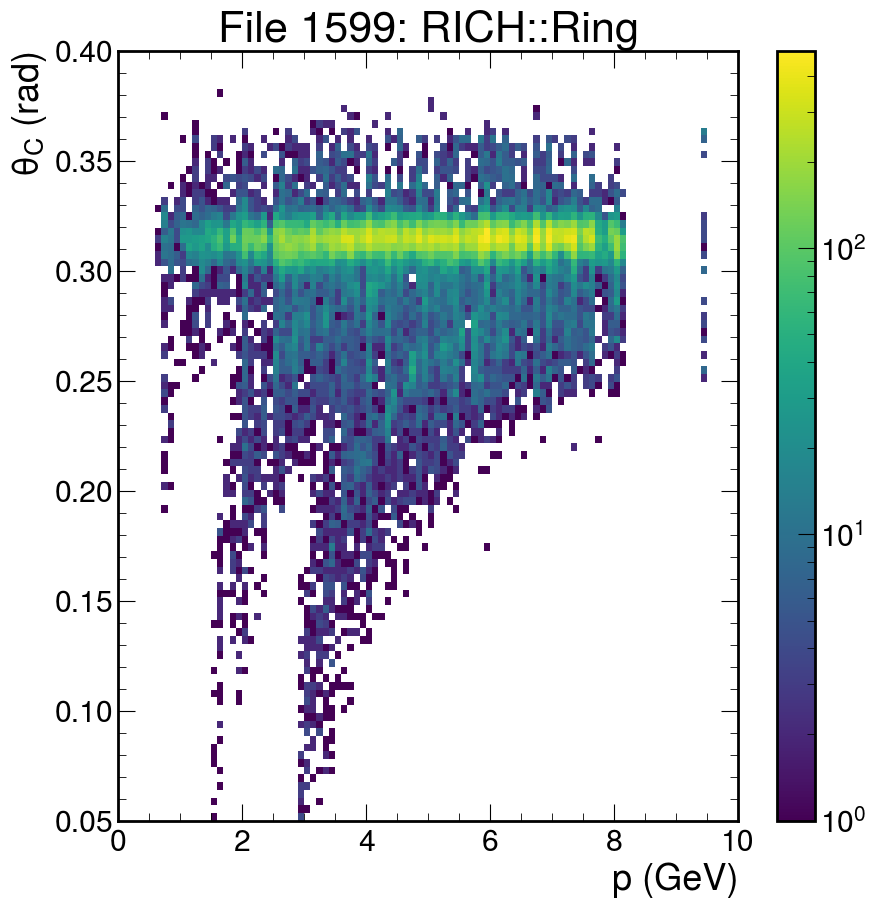

In [8]:
matching_particle_momenta = rec_particles["REC::Particles.p"][RICH_ring["RICH::Ring.pindex"]]
plt.hist2d(
    np.array(ak.flatten(matching_particle_momenta)),
    np.array(ak.flatten(RICH_ring["RICH::Ring.etaC"])),
    bins=100,
    range=( (0,10), (.05, .4)),
    norm = colors.LogNorm()
) 
plt.xlabel("p (GeV)")
plt.ylabel("$\\theta_C~(rad)$")
plt.colorbar()
plt.title("File 1599: RICH::Ring")

Text(0.5, 1.0, 'Reconstructed RICH hits')

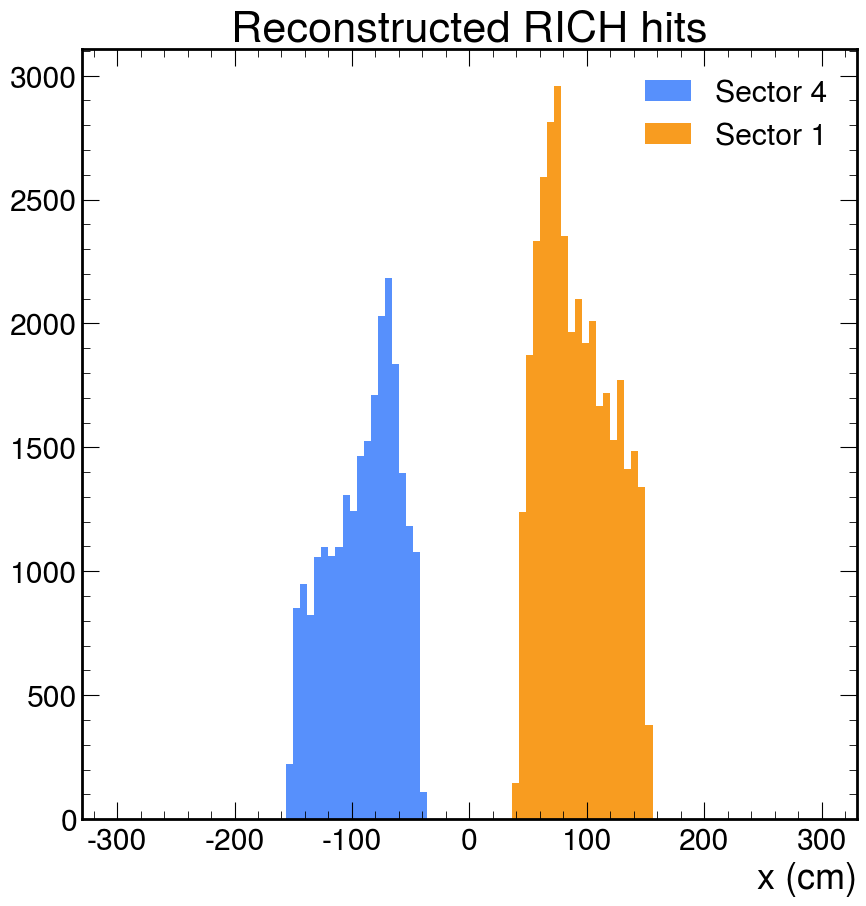

In [9]:
plt.hist(ak.flatten(RICH_hits["RICH::Hit.x"])[ak.flatten(RICH_hits["RICH::Hit.sector"])==4], bins=100, range=(-300,300), label="Sector 4")
plt.hist(ak.flatten(RICH_hits["RICH::Hit.x"])[ak.flatten(RICH_hits["RICH::Hit.sector"])==1], bins=100, range=(-300,300), label="Sector 1")
plt.xlabel("x (cm)")
plt.legend()
plt.title("Reconstructed RICH hits")

Text(0.5, 1.0, 'Reconstructed RICH hits')

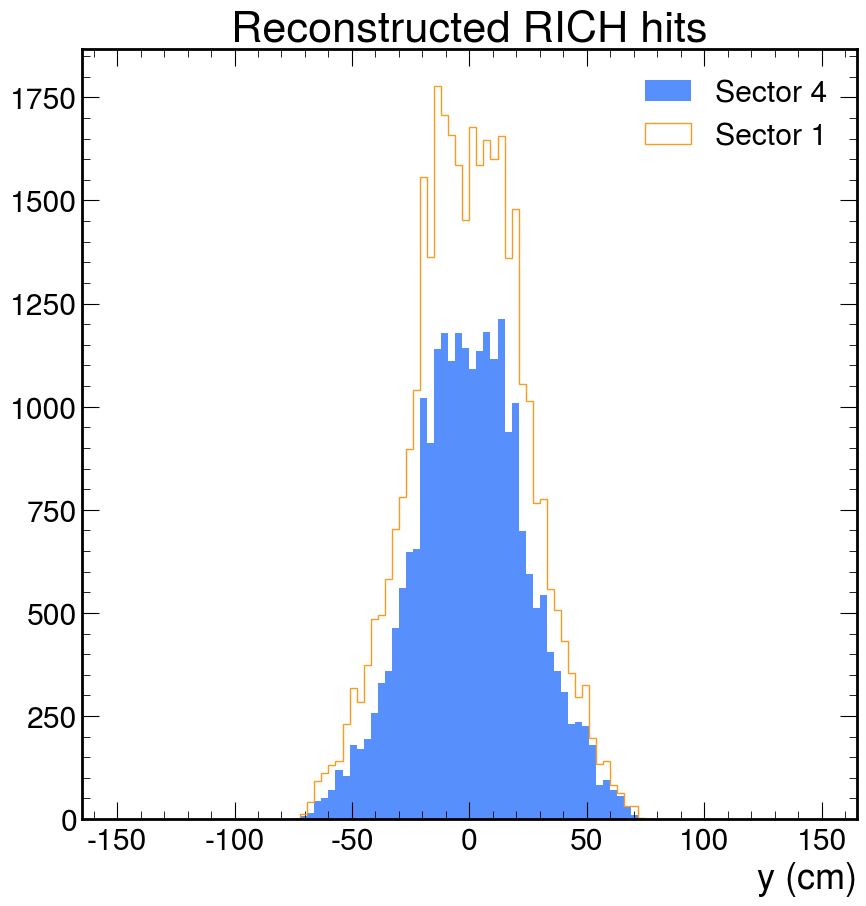

In [10]:
plt.hist(ak.flatten(RICH_hits["RICH::Hit.y"])[ak.flatten(RICH_hits["RICH::Hit.sector"])==4], bins=100, range=(-150,150), label="Sector 4")
plt.hist(ak.flatten(RICH_hits["RICH::Hit.y"])[ak.flatten(RICH_hits["RICH::Hit.sector"])==1], bins=100, range=(-150,150), label="Sector 1", histtype='step')
plt.xlabel("y (cm)")
plt.legend()
plt.title("Reconstructed RICH hits")

Text(0.5, 1.0, 'File 1599: RICH::Hits')

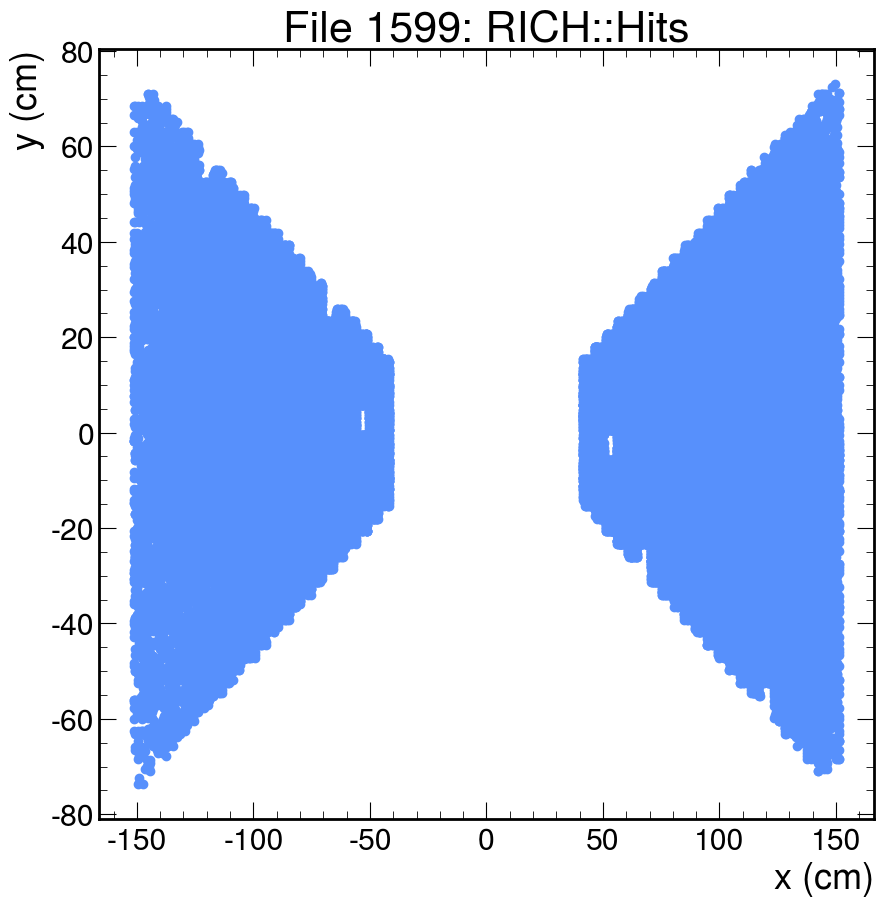

In [11]:
plt.scatter(ak.flatten(RICH_hits["RICH::Hit.x"]), ak.flatten(RICH_hits["RICH::Hit.y"]))
plt.ylabel("y (cm)")
plt.xlabel("x (cm)")
plt.title("File 1599: RICH::Hits")

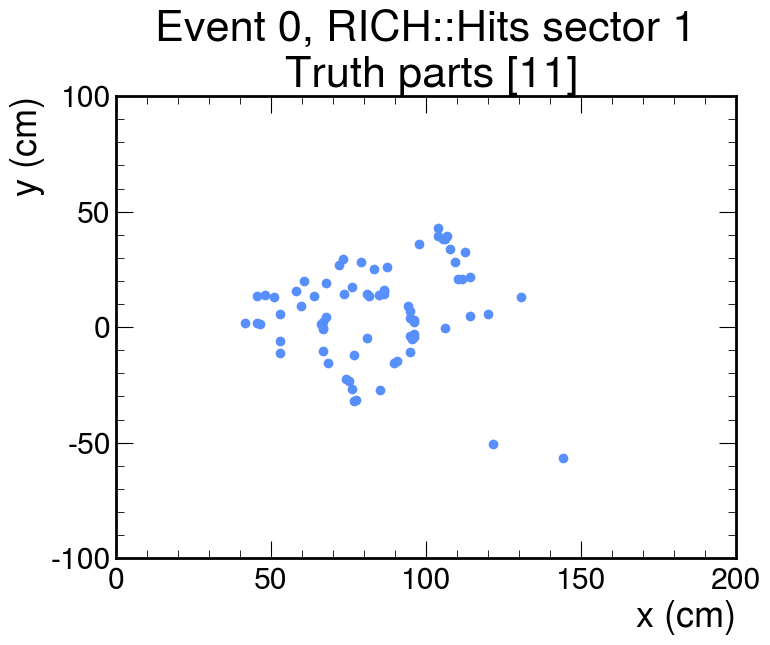

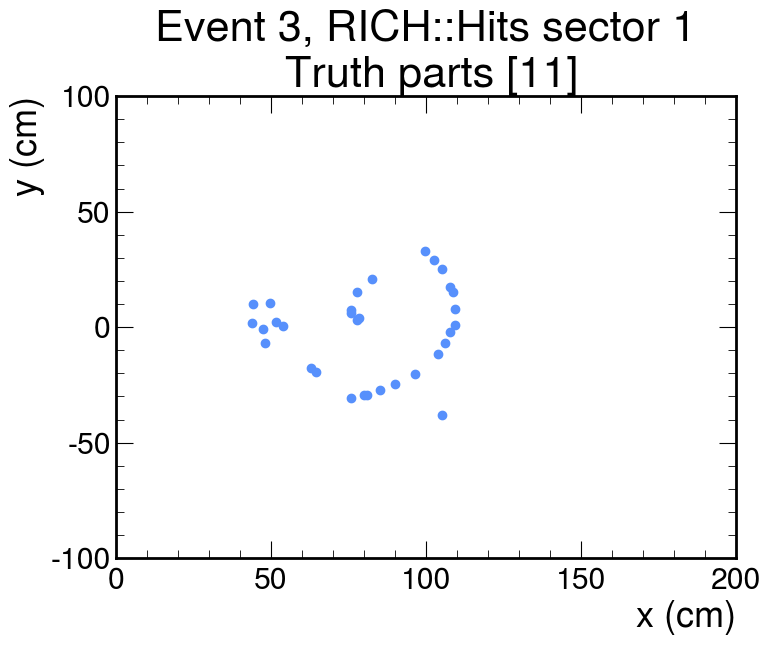

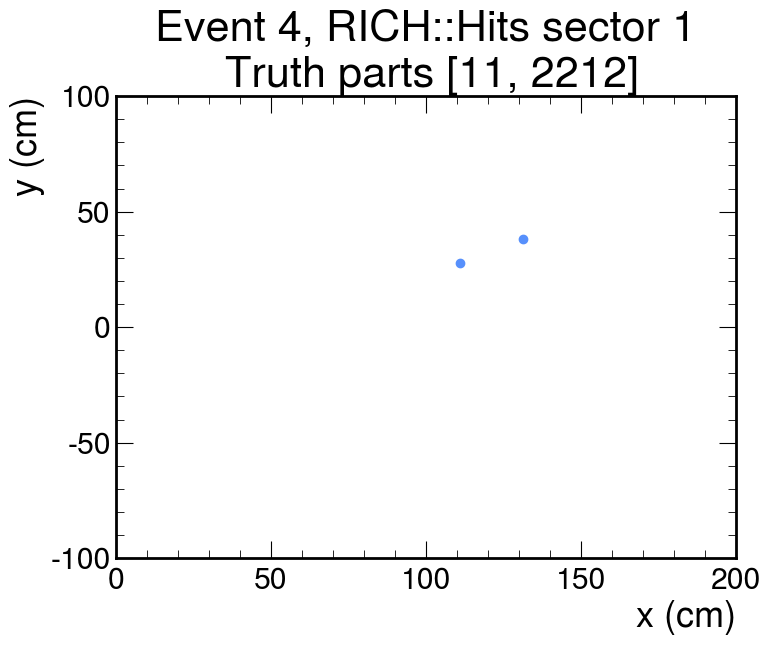

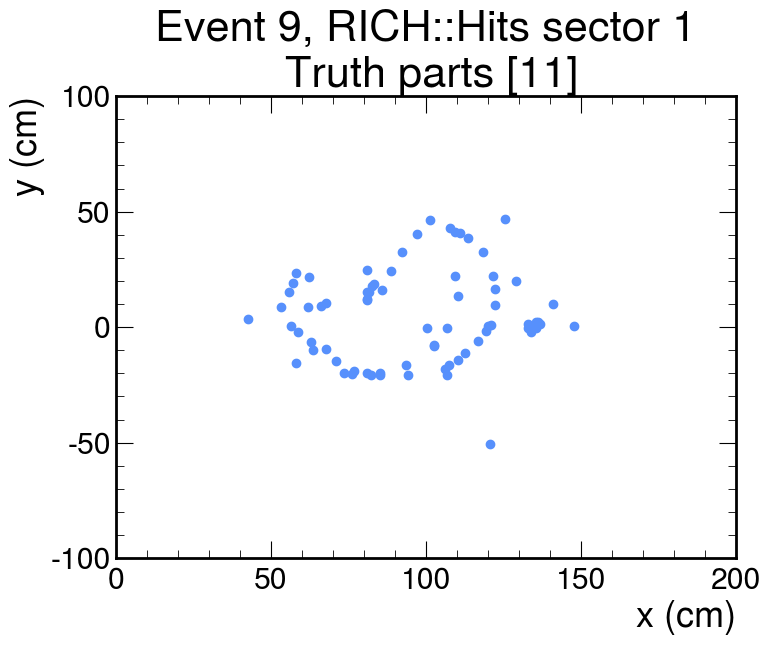

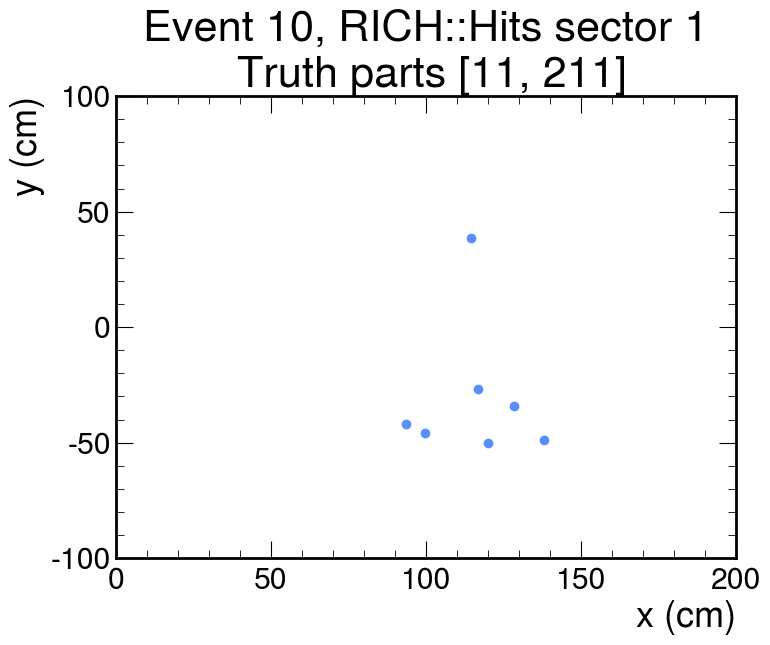

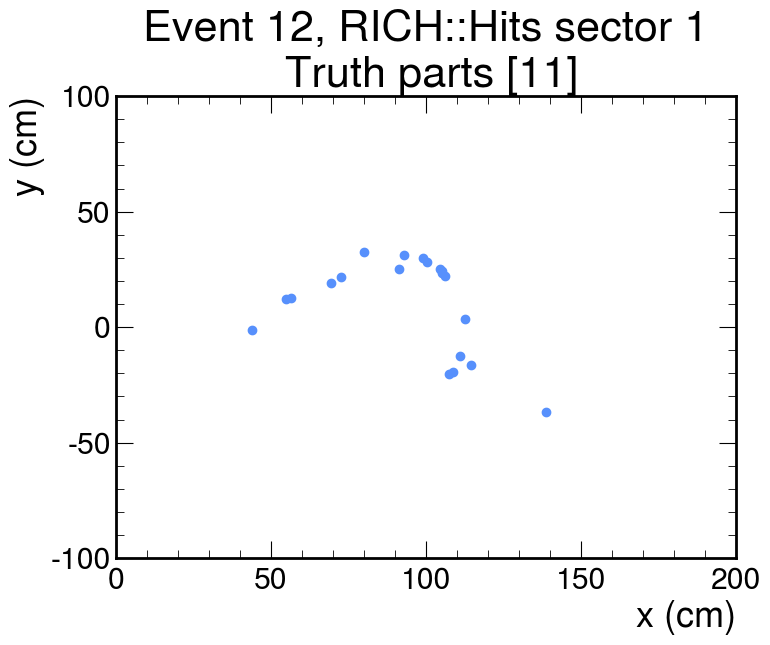

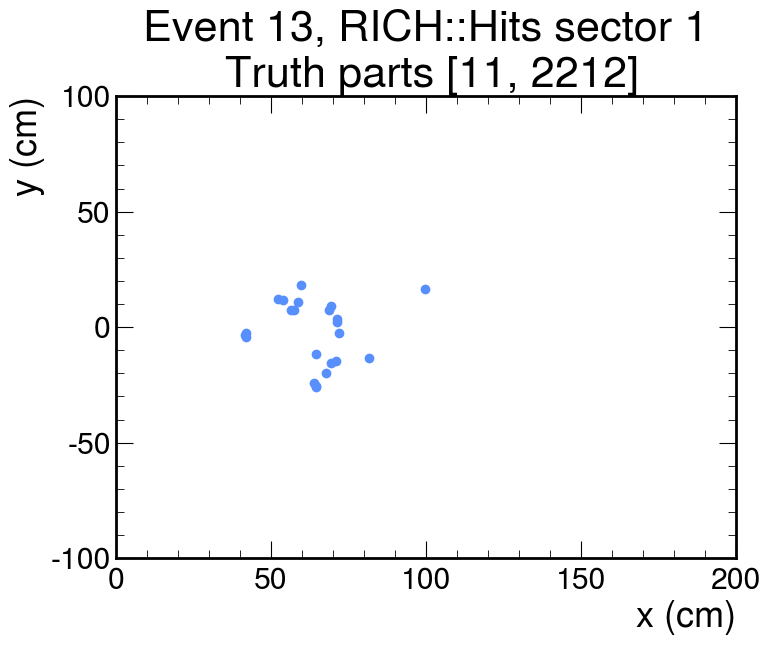

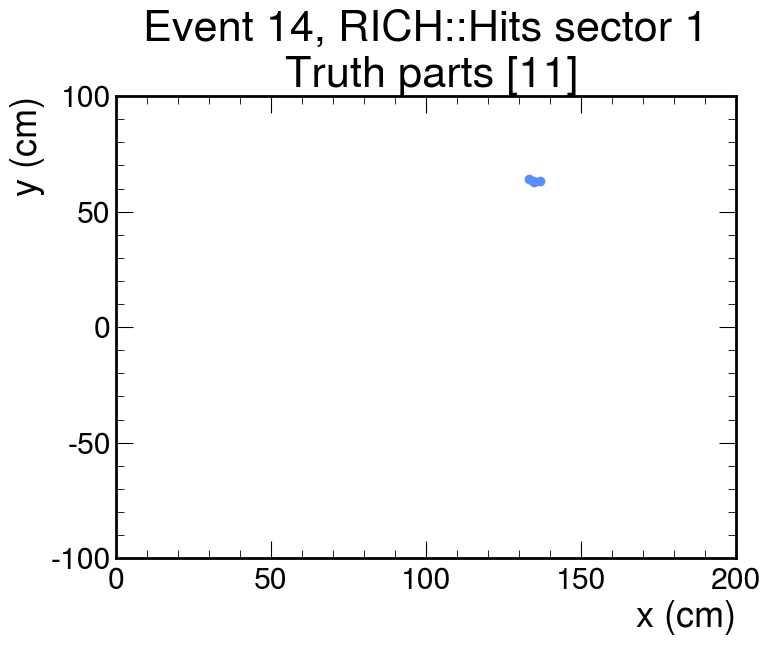

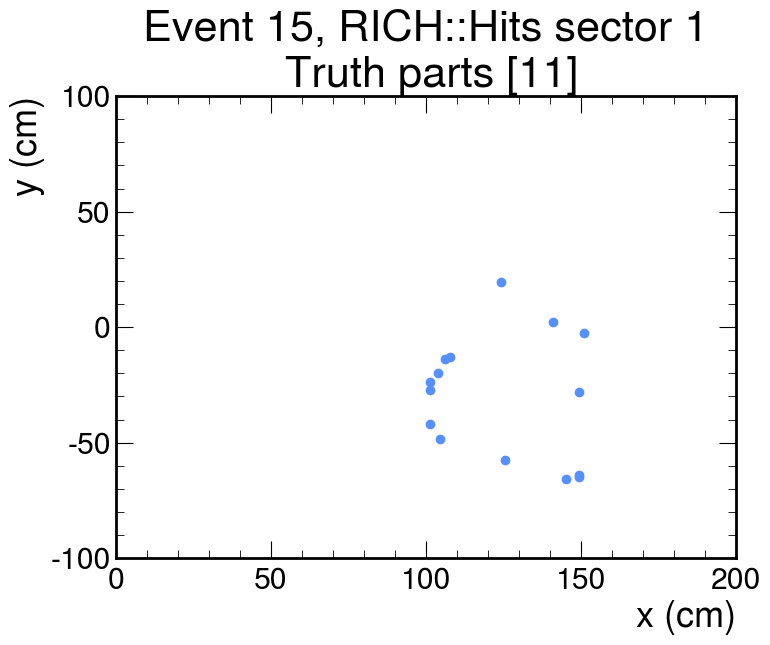

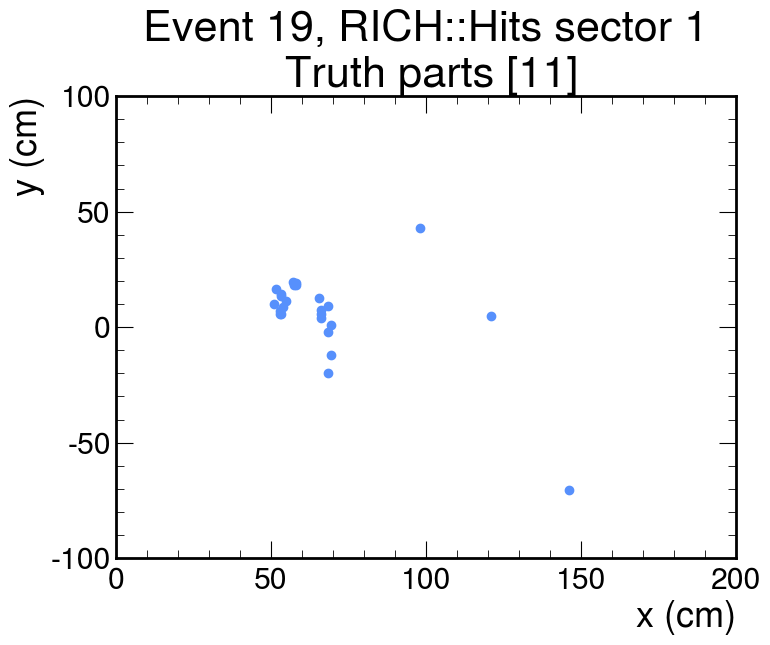

In [12]:
import matplotlib.pyplot as plt
import time

sector=1
sector_mask = RICH_hits["RICH::Hit.sector"]==sector
for event_num,(x, y) in enumerate(zip(RICH_hits["RICH::Hit.x"][sector_mask], RICH_hits["RICH::Hit.y"][sector_mask])):
    if event_num > 20:
        break
    if len(x)==0:
        continue
    if len(truth_particles["MC::Particle.pid"][event_num])==0:
        continue
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.xlim(0, 200)
    plt.ylim(-100, 100)
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.title(f"Event {event_num}, RICH::Hits sector 1\n Truth parts {truth_particles['MC::Particle.pid'][event_num]}")
    plt.show()
    

### Removing reconstructed particles that do not have a trajectory in the RICH

In [13]:
RICH_detector_ID = 18
RICH_trajectory_mask = rec_traj["REC::Traj.detector"]==RICH_detector_ID

RICH_aerogel_b1_mask = (RICH_trajectory_mask) & (rec_traj["REC::Traj.layer"]==2)
RICH_aerogel_b2_mask = (RICH_trajectory_mask) & (rec_traj["REC::Traj.layer"]==3)
RICH_aerogel_b3_mask = (RICH_trajectory_mask) & (rec_traj["REC::Traj.layer"]==4)

In [14]:
# In every event, we're selecting the pindices that are associated with a trajectory that crossed the RICH. 
# Sometimes a particle has two intersections with the RICH aerogel due to reflection. To avoid grabbing this index twice, we select the unique pindices
unique_pindex = []
for event_pindex in rec_traj[RICH_trajectory_mask]["REC::Traj.pindex"]:
    unique_pindex.append(np.unique(event_pindex).to_list())

/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/3849304102.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b1_mask])),
/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/3849304102.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b1_mask])),


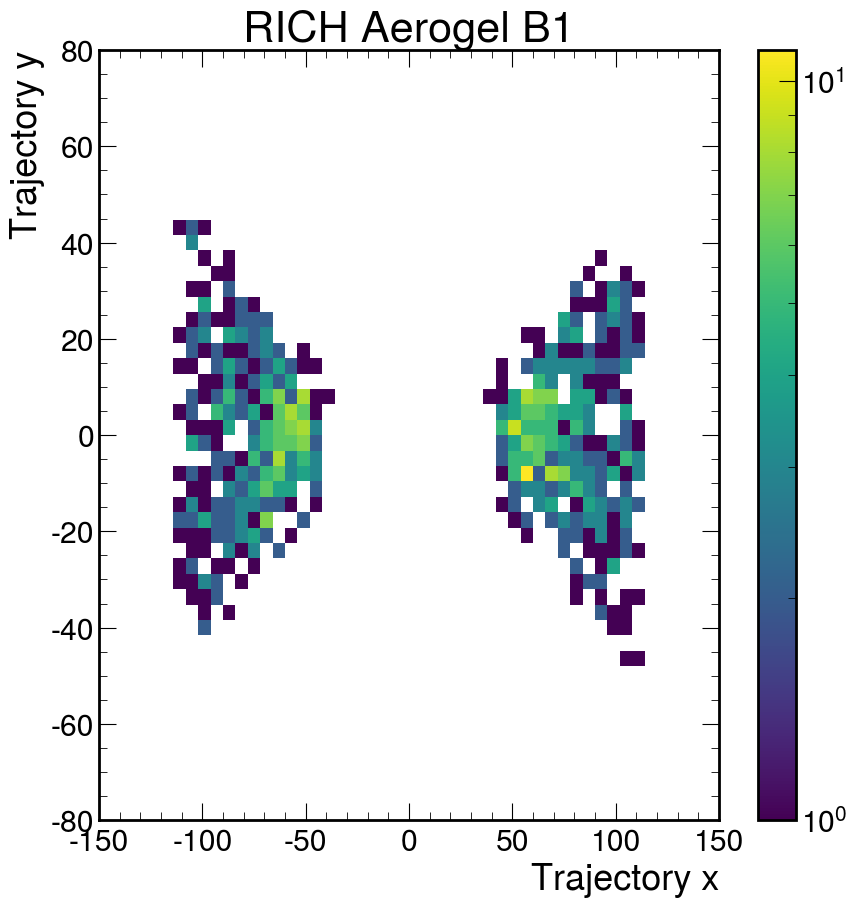

Text(0.5, 1.0, 'RICH Aerogel B1')

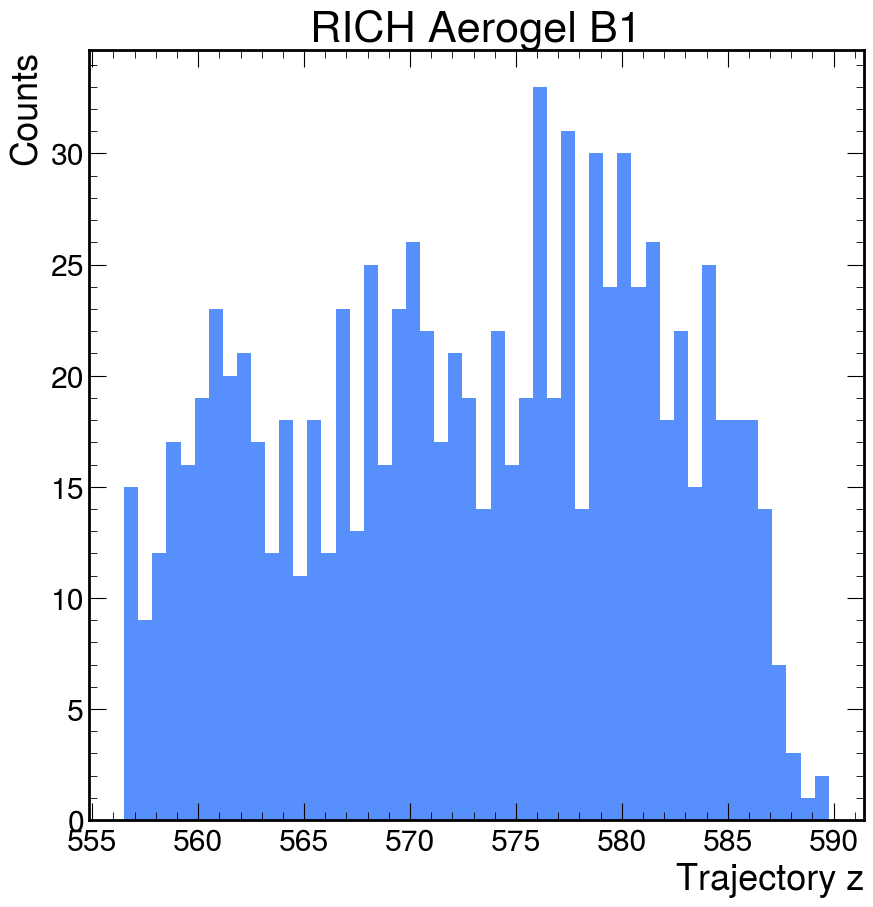

In [15]:
plt.hist2d(
    np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b1_mask])),
    np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b1_mask])),
    bins=50,
    range=((-150,150), (-80,80)),
    norm=colors.LogNorm()
    )
plt.xlabel("Trajectory x")
plt.ylabel("Trajectory y")
plt.title("RICH Aerogel B1")
plt.colorbar()
plt.show()
plt.hist(ak.flatten(rec_traj["REC::Traj.z"][RICH_aerogel_b1_mask]), bins=50)
plt.xlabel("Trajectory z")
plt.ylabel("Counts")
plt.title("RICH Aerogel B1")

/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/1723141748.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b2_mask])),
/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/1723141748.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b2_mask])),


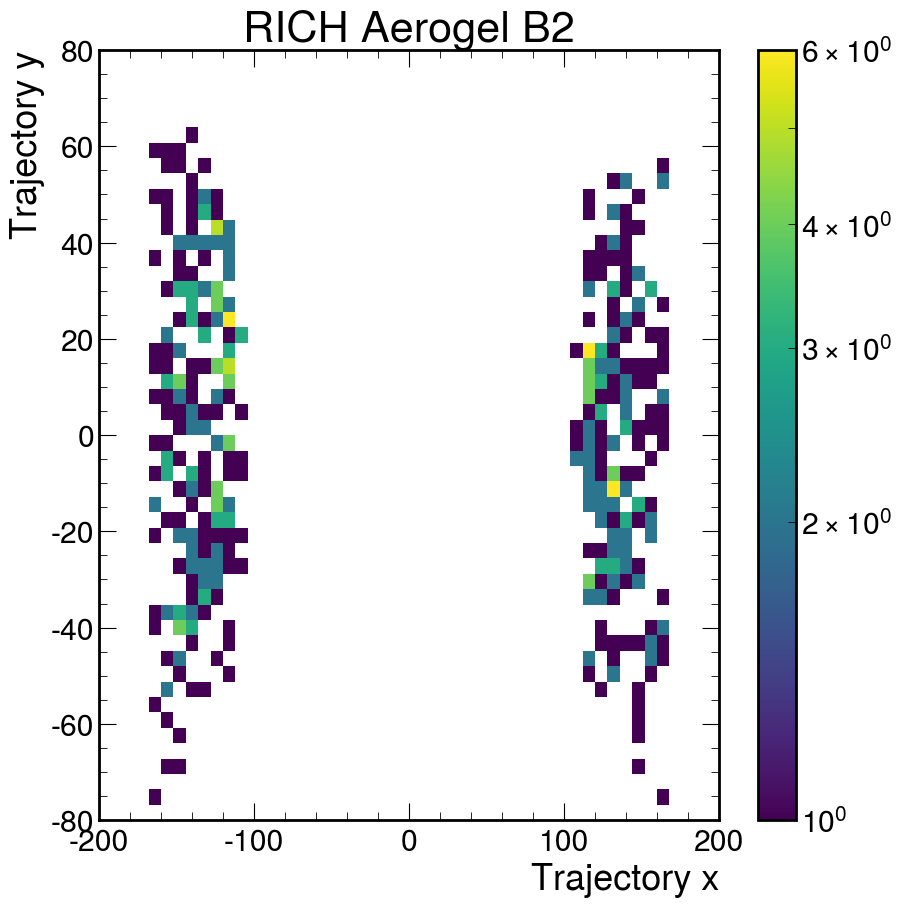

Text(0.5, 1.0, 'RICH Aerogel B2')

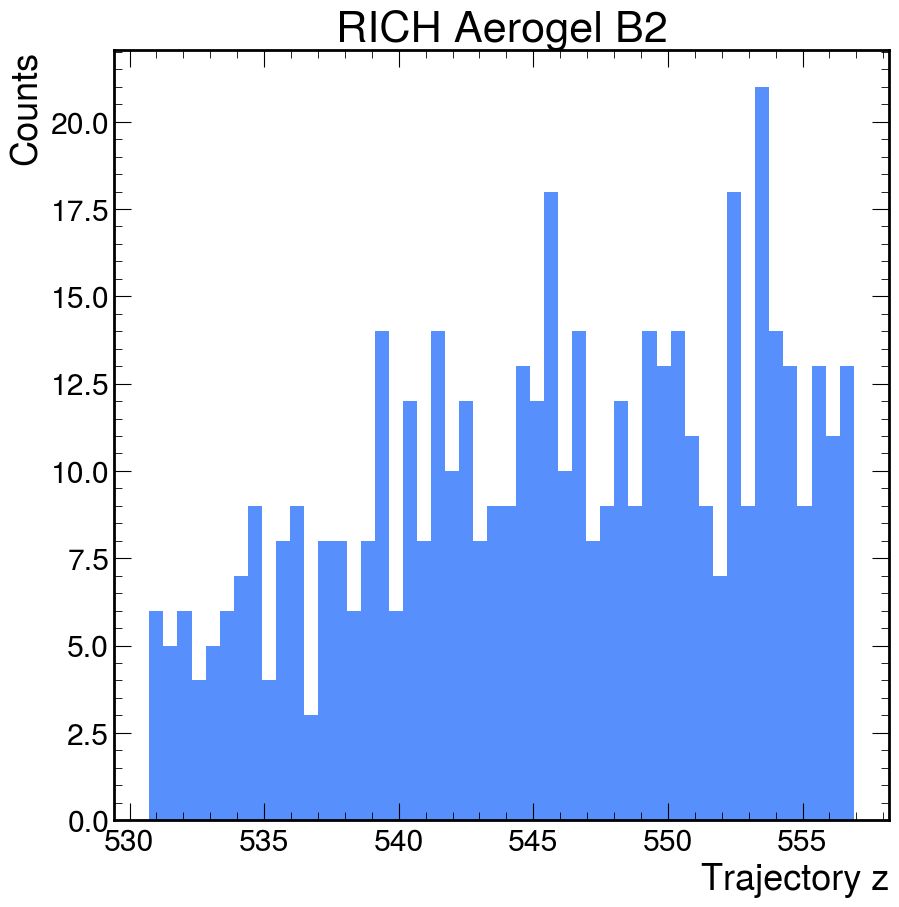

In [16]:
plt.hist2d(
    np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b2_mask])),
    np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b2_mask])),
    bins=50,
    range=((-200,200), (-80,80)),
    norm=colors.LogNorm()
    )
plt.xlabel("Trajectory x")
plt.ylabel("Trajectory y")
plt.title("RICH Aerogel B2")
plt.colorbar()
plt.show()
plt.hist(ak.flatten(rec_traj["REC::Traj.z"][RICH_aerogel_b2_mask]), bins=50)
plt.xlabel("Trajectory z")
plt.ylabel("Counts")
plt.title("RICH Aerogel B2")

/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/2662906187.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b3_mask])),
/scratch/slurm/53244475/.cache/tmp/ipykernel_45906/2662906187.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b3_mask])),


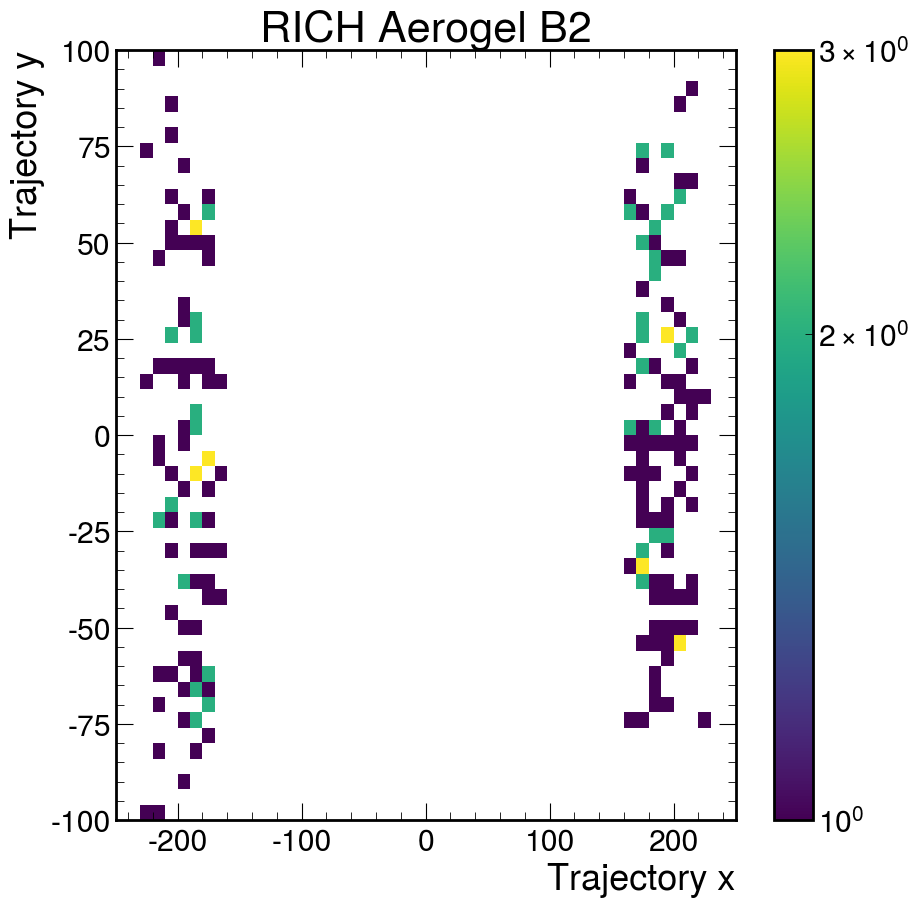

Text(0.5, 1.0, 'RICH Aerogel B3')

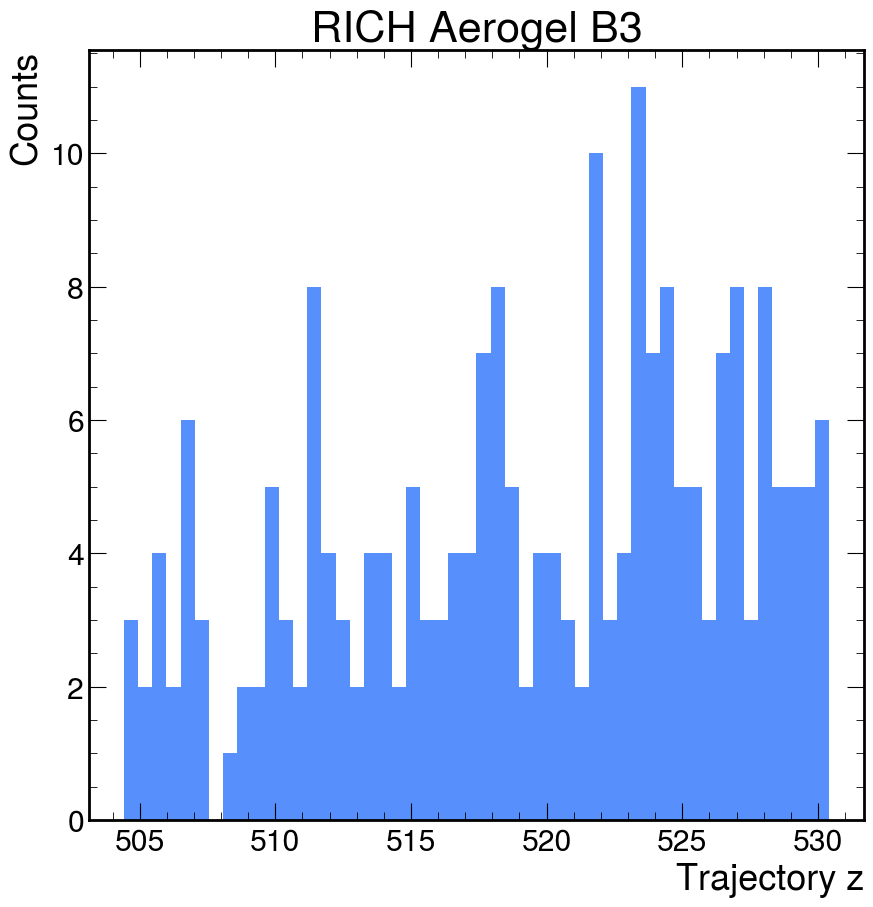

In [17]:
plt.hist2d(
    np.array(ak.flatten(rec_traj["REC::Traj.x"][RICH_aerogel_b3_mask])),
    np.array(ak.flatten(rec_traj["REC::Traj.y"][RICH_aerogel_b3_mask])),
    bins=50,
    range=((-250,250), (-100,100)),
    norm=colors.LogNorm()
    )
plt.xlabel("Trajectory x")
plt.ylabel("Trajectory y")
plt.title("RICH Aerogel B2")
plt.colorbar()
plt.show()
plt.hist(ak.flatten(rec_traj["REC::Traj.z"][RICH_aerogel_b3_mask]), bins=50)
plt.xlabel("Trajectory z")
plt.ylabel("Counts")
plt.title("RICH Aerogel B3")

### Calculating theta and phi for all the particles to do reco-truth matching

In [18]:
truth_particles["MC::Particle.phi"] = np.atan2(truth_particles["MC::Particle.py"], truth_particles["MC::Particle.px"])
truth_particles["MC::Particle.phi"] = ak.where(truth_particles["MC::Particle.phi"] < 0, truth_particles["MC::Particle.phi"] + 2 * np.pi, truth_particles["MC::Particle.phi"])*180/np.pi
rec_particles["REC::Particles.phi"] = np.atan2(rec_particles["REC::Particles.py"], rec_particles["REC::Particles.px"])
rec_particles["REC::Particles.phi"] = ak.where(rec_particles["REC::Particles.phi"] < 0, rec_particles["REC::Particles.phi"] + 2 * np.pi, rec_particles["REC::Particles.phi"])*180/np.pi
truth_particles["MC::Particle.theta"] = np.arccos(truth_particles["MC::Particle.pz"]/truth_particles["MC::Particle.p"])*180/np.pi
rec_particles["REC::Particles.theta"] = np.arccos(rec_particles["REC::Particles.pz"]/rec_particles["REC::Particles.p"]) * 180/np.pi

In [19]:
rec_particles_RICH = rec_particles[unique_pindex]

There are two peaks because the data files only store events with hits in the RICH. This makes most particles have phi in the two sectors with the RICH (1 and 4)

(0.0, 0.018)

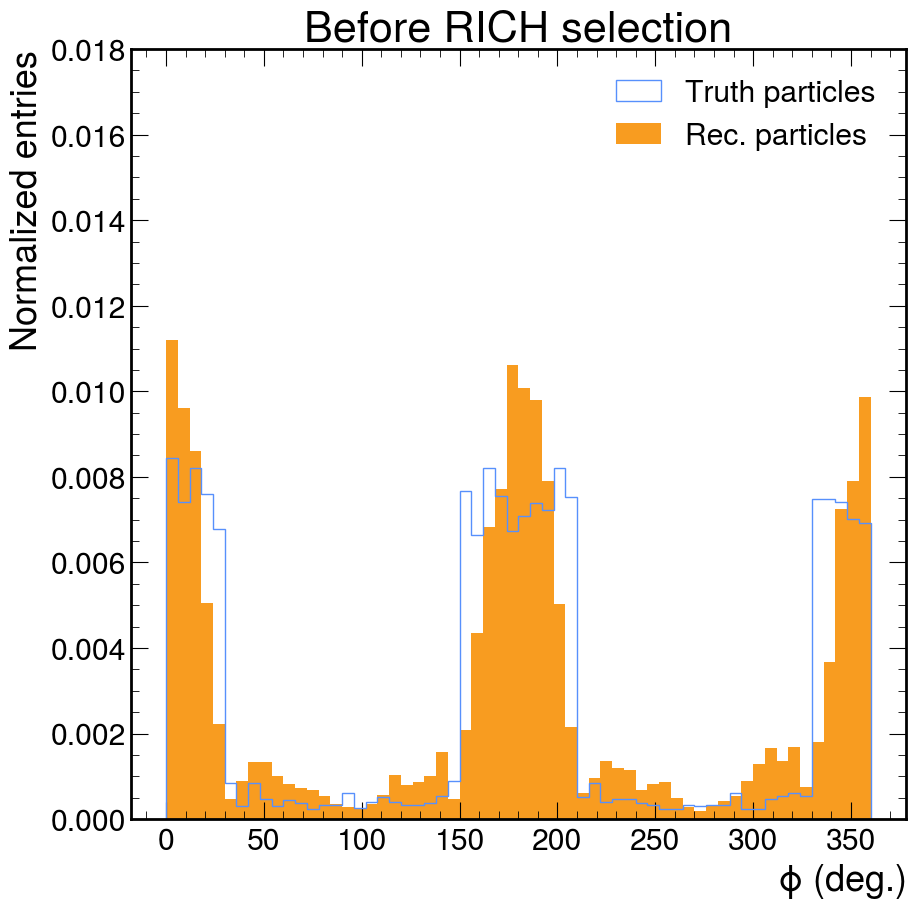

In [20]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(rec_particles["REC::Particles.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("$\phi$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("Before RICH selection")
plt.ylim(0, .018)

(0.0, 0.018)

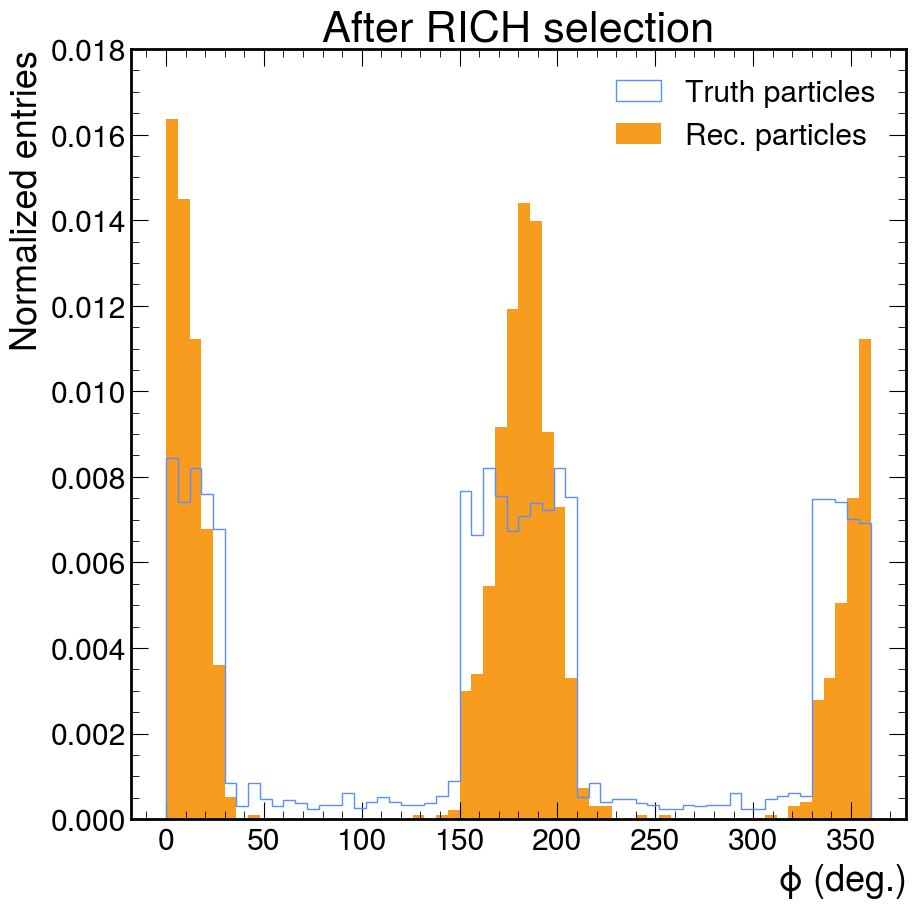

In [21]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(rec_particles_RICH["REC::Particles.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("$\phi$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After RICH selection")
plt.ylim(0, .018)

Text(0.5, 1.0, 'Before RICH selection')

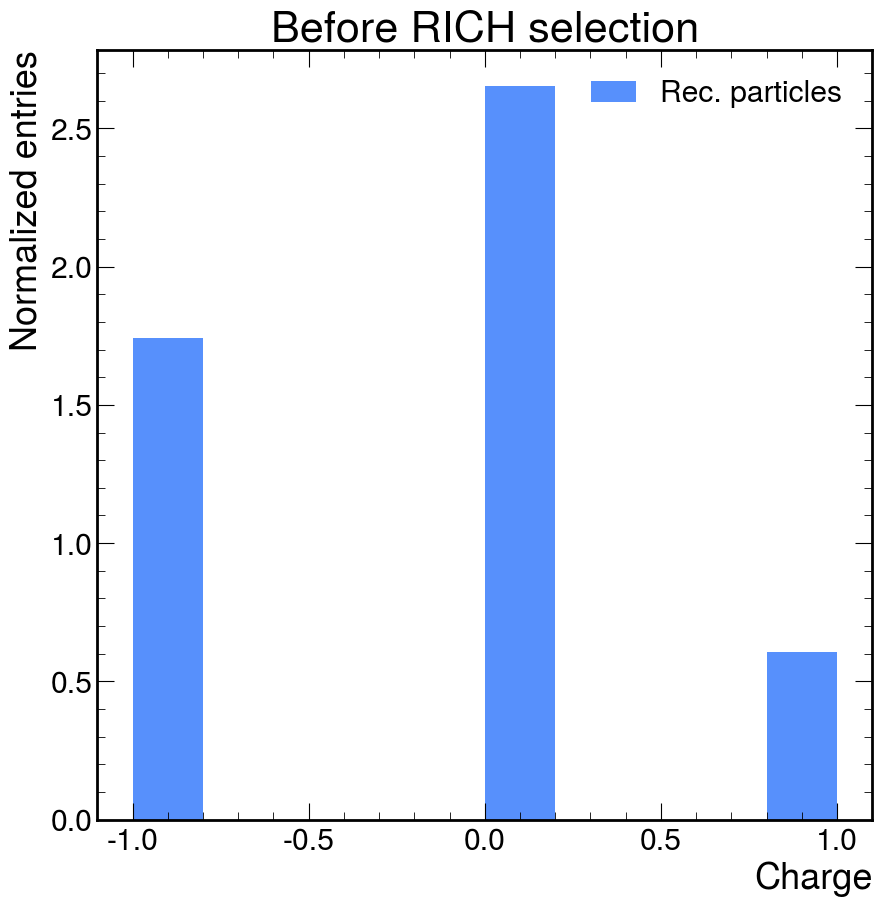

In [22]:
fig = plt.figure()
plt.hist(
    ak.flatten(rec_particles["REC::Particles.charge"]),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("Charge")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("Before RICH selection")
# plt.ylim(0, .15)

Text(0.5, 1.0, 'After RICH selection')

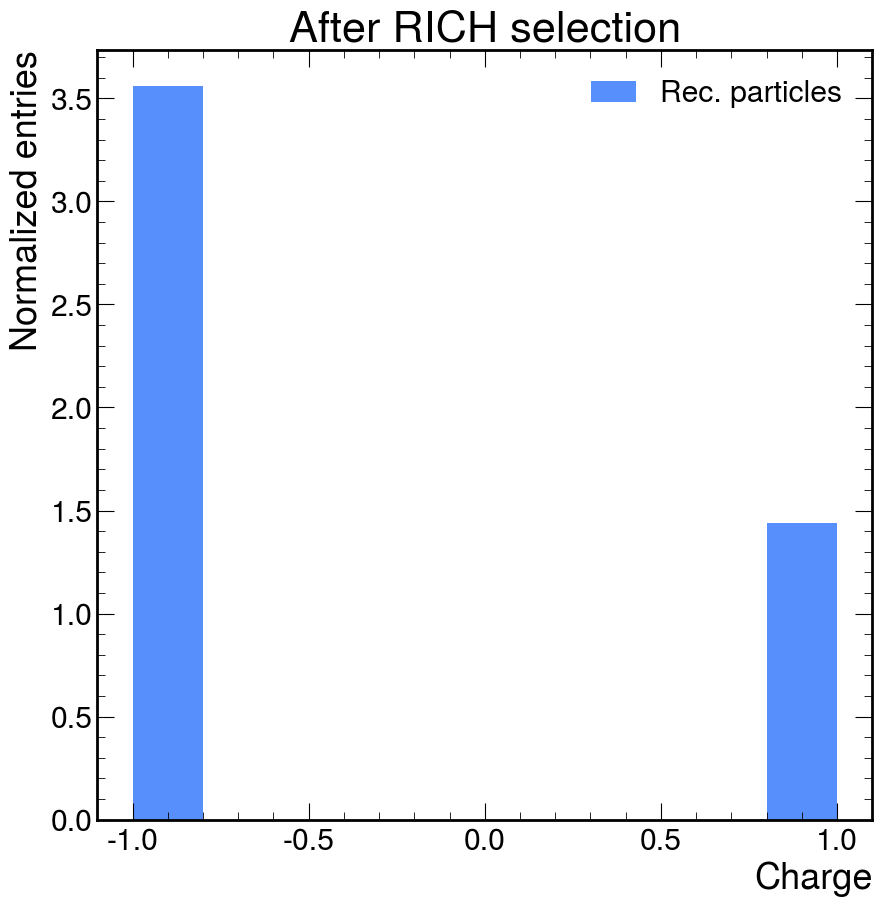

In [23]:
fig = plt.figure()
plt.hist(
    ak.flatten(rec_particles_RICH["REC::Particles.charge"]),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("Charge")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After RICH selection")
# plt.ylim(0, .15)

(0.0, 0.15)

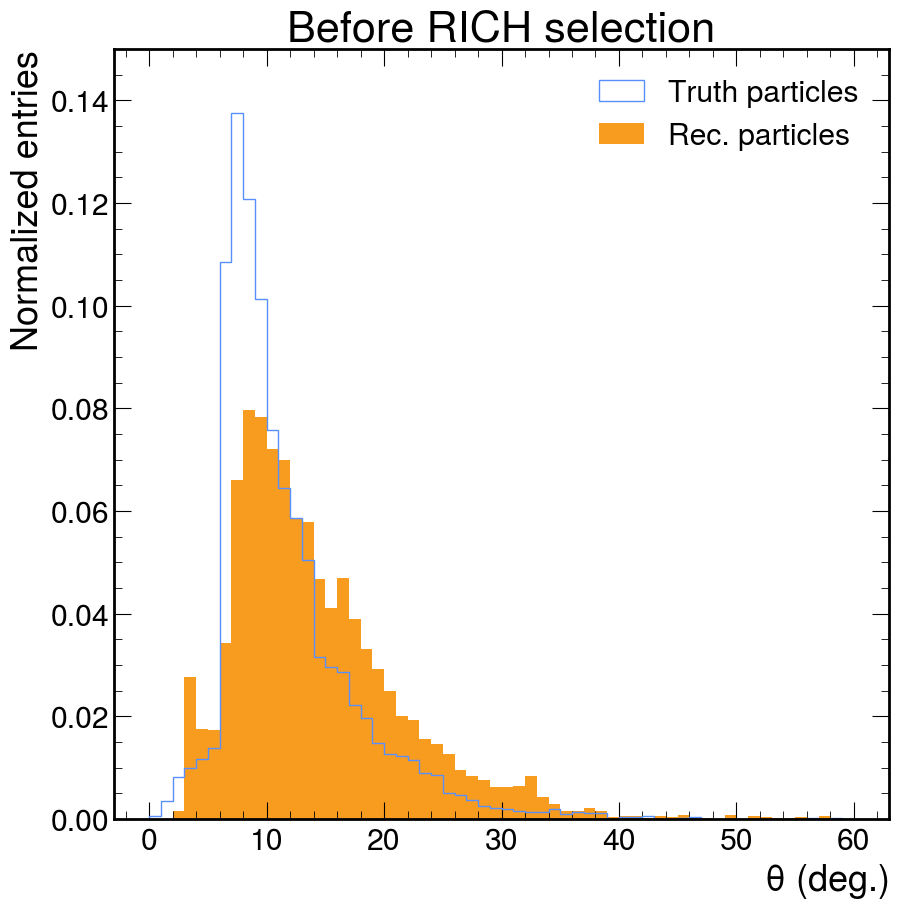

In [24]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.theta"]),
    bins = 60,
    range=(0,60),
    label = "Truth particles",
    histtype='step',
    density = True
)

plt.hist(
    ak.flatten(rec_particles["REC::Particles.theta"]),
    bins = 60,
    range=(0,60),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("$\\theta$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("Before RICH selection")
plt.ylim(0, .15)

(0.0, 0.15)

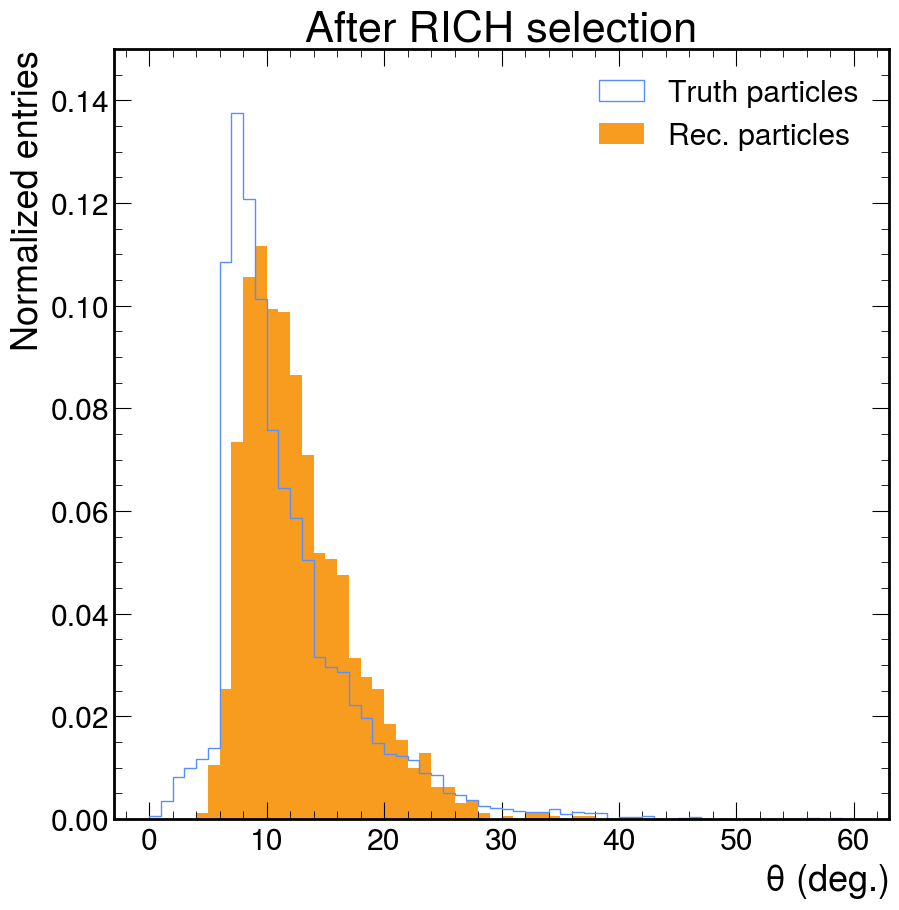

In [25]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.theta"]),
    bins = 60,
    range=(0,60),
    label = "Truth particles",
    histtype='step',
    density = True
)

plt.hist(
    ak.flatten(rec_particles_RICH["REC::Particles.theta"]),
    bins = 60,
    range=(0,60),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("$\\theta$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After RICH selection")
plt.ylim(0, .15)

Text(0.5, 1.0, 'Before RICH selection')

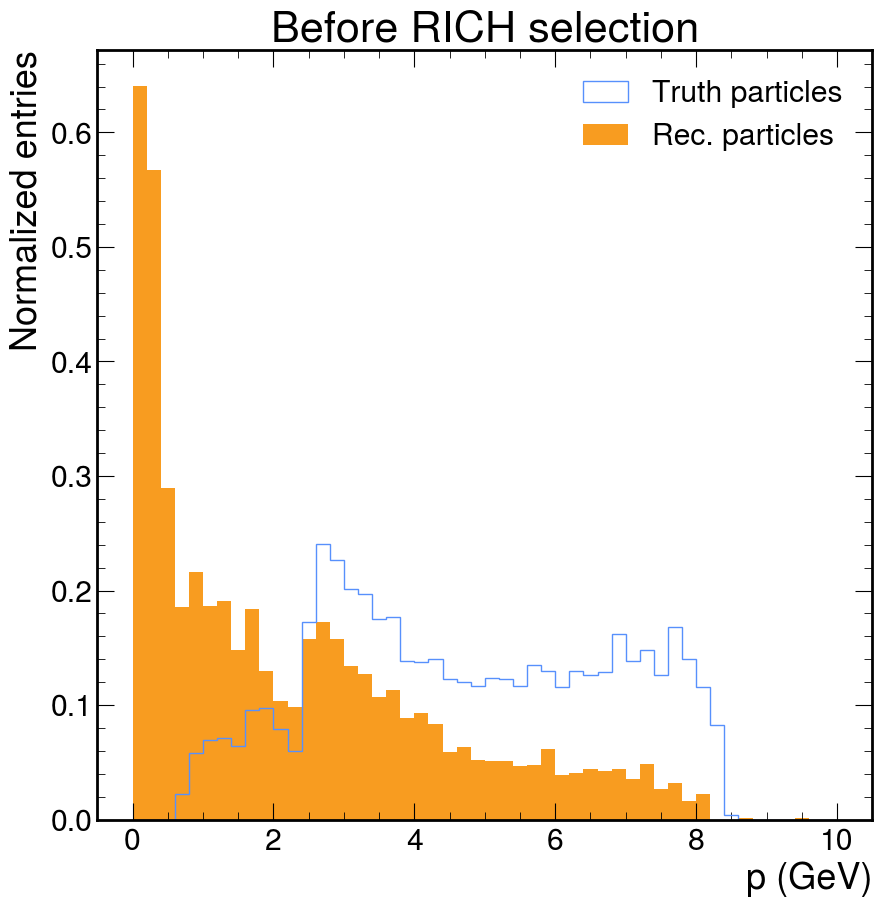

In [26]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.p"]),
    bins = 50,
    range = (0, 10),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(rec_particles["REC::Particles.p"]),
    bins = 50,
    range = (0, 10),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("p (GeV)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("Before RICH selection")
# plt.ylim(0, .018)

Text(0.5, 1.0, 'After RICH selection')

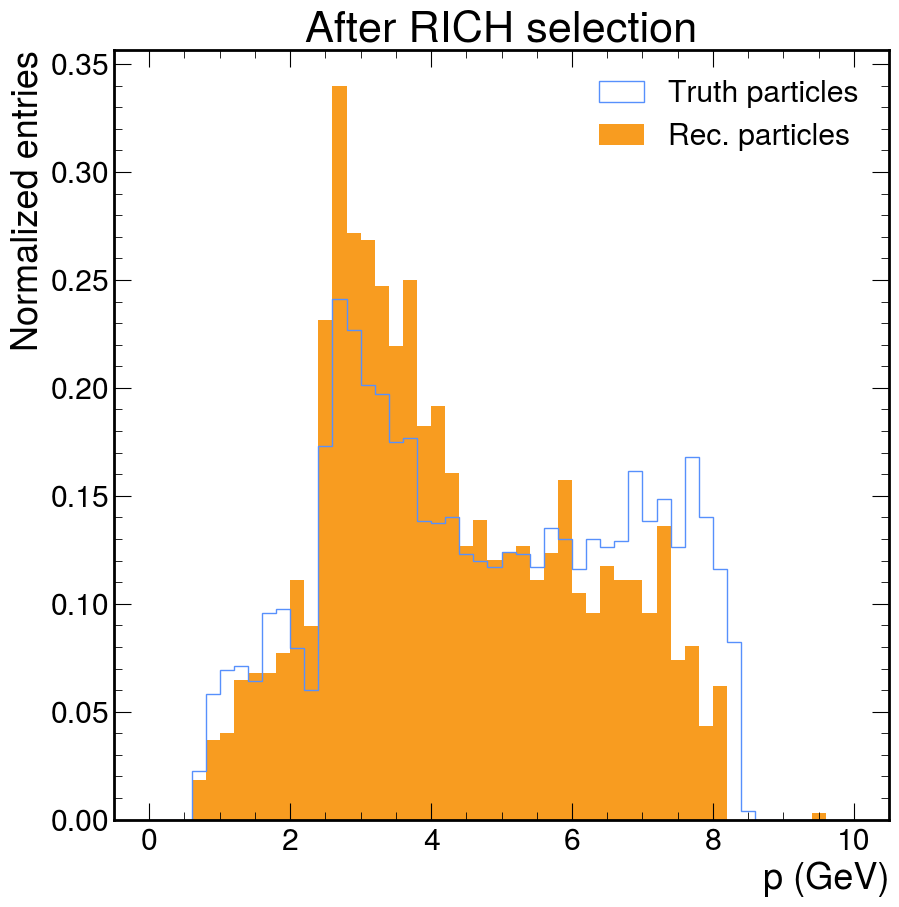

In [27]:
fig = plt.figure()
plt.hist(
    ak.flatten(truth_particles["MC::Particle.p"]),
    bins = 50,
    range = (0, 10),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(rec_particles_RICH["REC::Particles.p"]),
    bins = 50,
    range = (0, 10),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("p (GeV)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After RICH selection")
# plt.ylim(0, .018)

In [28]:
neutral_mask = (rec_particles_RICH["REC::Particles.charge"]>0) | (rec_particles_RICH["REC::Particles.charge"]<0)
rec_particles_RICH = rec_particles_RICH[neutral_mask]

Text(0.5, 1.0, 'After charge selection')

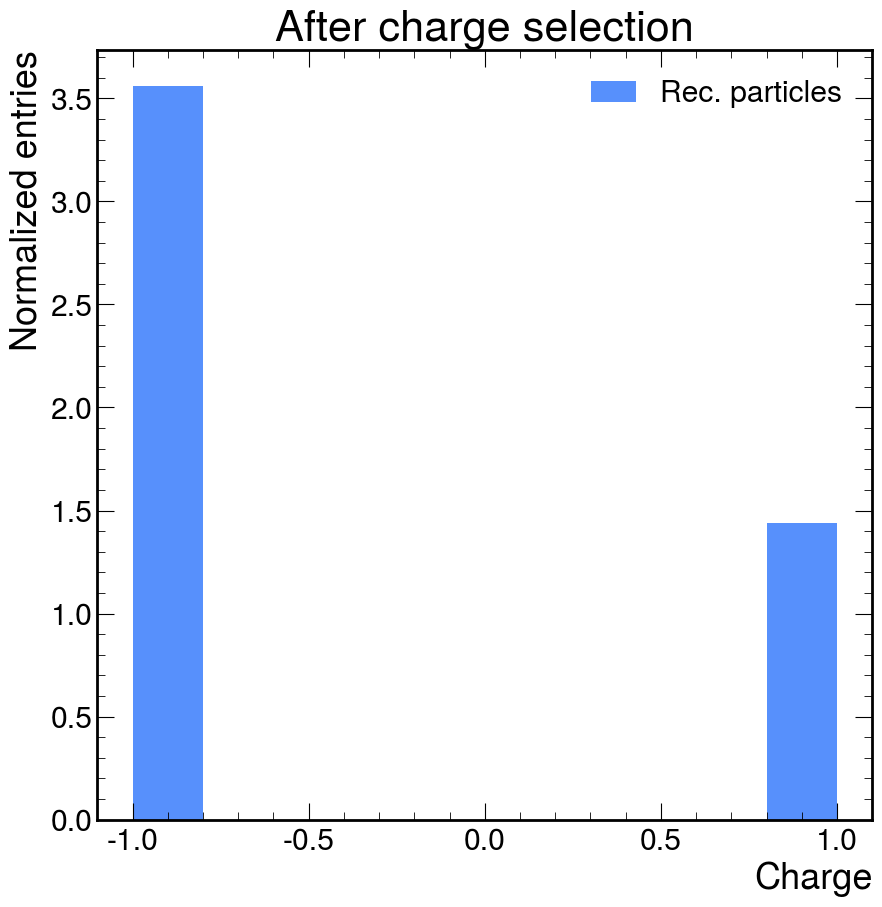

In [29]:
fig = plt.figure()
plt.hist(
    ak.flatten(rec_particles_RICH["REC::Particles.charge"]),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("Charge")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After charge selection")
# plt.ylim(0, .15)

In [30]:
rec_particles = rec_particles_RICH

### Calculating angular separation between truth and reco particles
- For each reco particle, we match only 1 truth particle to it by choosing the truth particle that minimizes $\Delta R = \sqrt{ (\phi_{truth} - \phi_{rec})^2 + (\theta_{truth} - \theta_{rec})^2}$
- If two reco particles correspond to the same truth particle, we keep the matching with the smaller $\Delta R$ value. The other particle then gets matched to the next smallest $\Delta R$ value. If there are no more truth particles in the event, we say the particle isn't matched.
- All truth particles that aren't matched aren't given a matching index of -1.

In [31]:
def angular_difference(a, b):
    diff = (a - b + 180) % 360 - 180
    return diff

In [32]:
delta_R = []
delta_R_cut_value = 10

for event in range(len(rec_particles["REC::Particles.theta"])):
    if len(rec_particles["REC::Particles.theta"][event]) > len(truth_particles["MC::Particle.theta"][event]):
        print(event)
    delta_R_event = []
    matching_index_event = []
    for rec_phi, rec_theta in zip(rec_particles["REC::Particles.phi"][event], rec_particles["REC::Particles.theta"][event]):
        delta_R_particle = []
        for truth_phi, truth_theta in zip(truth_particles["MC::Particle.phi"][event], truth_particles["MC::Particle.theta"][event]):
            delta_R_particle.append(np.sqrt( angular_difference(rec_phi, truth_phi )**2 + (rec_theta- truth_theta)**2))
        delta_R_event.append(delta_R_particle)
    delta_R.append(delta_R_event)

In [33]:
def find_second_smallest(arr):
    if len(arr) < 2:
        return -1
    sorted_indices = np.argsort(arr)
    second_smallest_index = sorted_indices[1]
    return second_smallest_index

In [34]:
matching_index, min_delta_R, keep_reco = [], [], []

for event_i, delta_R_event in enumerate(delta_R):
    matching_index_event = []
    min_delta_R_event = []
    keep_reco_event = []

    # Looping over all the delta R for each reco particle in the event
    for particle_delta_R in delta_R_event:
        if len(particle_delta_R) == 0:
            print(f"Event number {event_i} had no truth particles for DeltaR calculation!")
            matching_index_event.append(-1)
            min_delta_R_event.append(-1)
            keep_reco_event.append(False)
            continue
        # Finding the minimum delta R. i.e. the corresponding truth particle
        min_index = np.argmin(particle_delta_R)
        min_delta_R_particle = particle_delta_R[min_index]
        # If the minimum delta R value is greater than the cutoff, don't consider this particle
        if min_delta_R_particle > delta_R_cut_value:
            matching_index_event.append(-1)
            min_delta_R_event.append(-1)
            keep_reco_event.append(False)
            continue
        # Handling the case where two reco particles correspond to the same truth particle
        # In this case, keep the particle with the smaller Delta R value.
        # Give the other particle the next smallest Delta R matching. If there isn't one, append -1
        if min_index in matching_index_event:
            other_particle_index = matching_index_event.index(min_index) # Getting index of other reco particle in the event
            other_particle_deltaR = min_delta_R_event[other_particle_index]
            if min_delta_R_particle < other_particle_deltaR:
                # Add this particle
                matching_index_event.append(min_index)
                min_delta_R_event.append(min_delta_R_particle)
                keep_reco_event.append(True)
                # Get second lowest delta R for other particle
                all_other_delta_R = delta_R_event[other_particle_index]
                second_smallest_index = find_second_smallest(all_other_delta_R)
                # Getting the second smallest Delta R for this particle.
                # If there is no second smallest, it'll have index -1 and we'll ignore this particle
                # If there is a second smallest, check if the Delta R value satisifies the Delta R cut
                matching_index_event[other_particle_index] = second_smallest_index
                if second_smallest_index > -1:
                    if all_other_delta_R[second_smallest_index] > delta_R_cut_value:
                        min_delta_R_event[other_particle_index] = all_other_delta_R[second_smallest_index]
                        keep_reco_event[other_particle_index] = True
                    else:
                        min_delta_R_event[other_particle_index] = -1
                        keep_reco_event[other_particle_index] = False
                else:
                        min_delta_R_event[other_particle_index] = -1
                        keep_reco_event[other_particle_index] = False
            else:
                # For the current particle, get the second smallest Delta R if it exists.
                # Make sure it satisfies the Delta R cut
                second_smallest_index = find_second_smallest(particle_delta_R)
                matching_index_event.append(second_smallest_index)
                if second_smallest_index > -1:
                    if particle_delta_R[second_smallest_index] > delta_R_cut_value:
                        min_delta_R_event.append(particle_delta_R[second_smallest_index])
                        keep_reco_event.append(True)
                    else:
                        min_delta_R_event.append(-1)
                        keep_reco_event.append(False)
                else:
                    min_delta_R_event.append(-1)
                    keep_reco_event.append(False)
        else:
            matching_index_event.append(min_index)
            min_delta_R_event.append(min_delta_R_particle)
            keep_reco_event.append(True)
    matching_index.append(matching_index_event)
    min_delta_R.append(min_delta_R_event)
    keep_reco.append(keep_reco_event)

matching_index = ak.Array(matching_index)
min_delta_R = ak.Array(min_delta_R)
keep_reco = ak.Array(keep_reco)
matching_index = matching_index[keep_reco]
min_delta_R = min_delta_R[keep_reco]


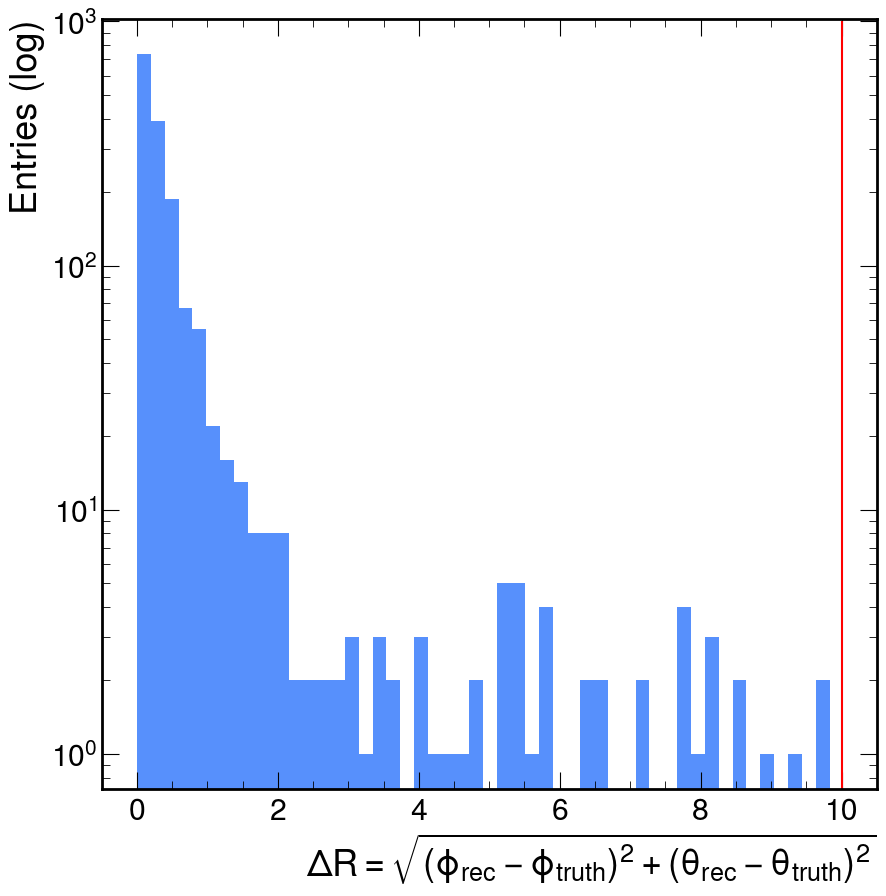

In [35]:
plt.hist(
    ak.flatten(min_delta_R),
    bins=50);
plt.yscale('log')
plt.xlabel("$\Delta R = \sqrt{ (\phi_{rec} - \phi_{truth})^2 + (\\theta_{rec} - \\theta_{truth})^2}$")
plt.ylabel("Entries (log)")
plt.vlines(x=delta_R_cut_value, ymin = 0, ymax=1000, color='red')

Text(0, 1, 'Entries (log)')

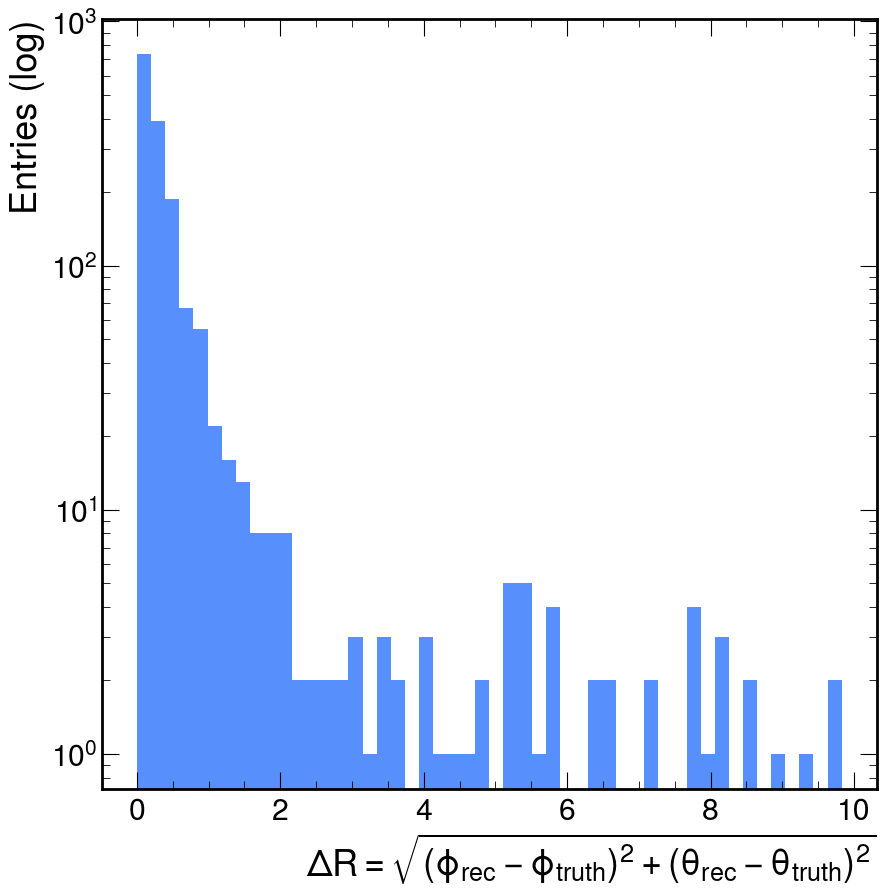

In [36]:
plt.hist(
    ak.flatten(min_delta_R),
    bins=50);
plt.yscale('log')
plt.xlabel("$\Delta R = \sqrt{ (\phi_{rec} - \phi_{truth})^2 + (\\theta_{rec} - \\theta_{truth})^2}$")
plt.ylabel("Entries (log)")


In [37]:
matching_truth_particles=truth_particles[matching_index]
matching_rec_particles = rec_particles[keep_reco]
electron_mask = (matching_truth_particles["MC::Particle.pid"] != 11) & (matching_truth_particles["MC::Particle.pid"]!=-11)
matching_truth_particles=matching_truth_particles[electron_mask]
matching_rec_particles=matching_rec_particles[electron_mask]

(0.0, 0.15)

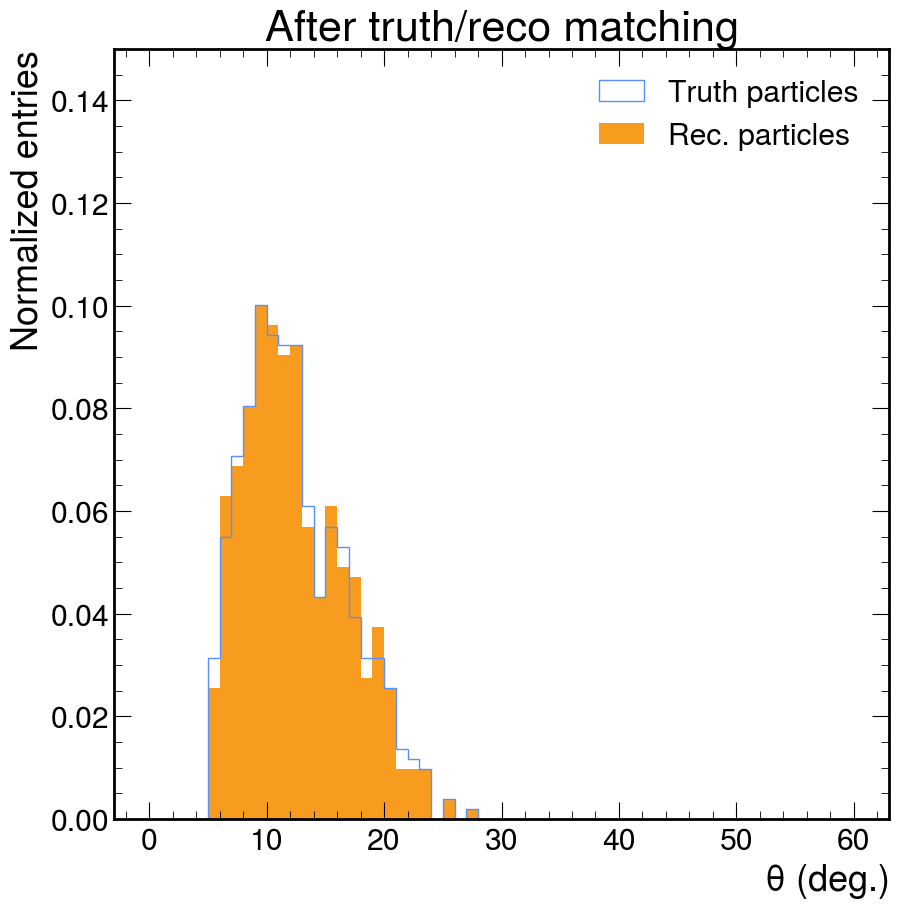

In [38]:
fig = plt.figure()
plt.hist(
    ak.flatten(matching_truth_particles["MC::Particle.theta"]),
    bins = 60,
    range=(0,60),
    label = "Truth particles",
    histtype='step',
    density = True
)

plt.hist(
    ak.flatten(matching_rec_particles["REC::Particles.theta"]),
    bins = 60,
    range=(0,60),
    label = "Rec. particles",
    histtype='stepfilled',
    density = True
)
plt.xlabel("$\\theta$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After truth/reco matching")
plt.ylim(0, .15)

(0.0, 0.018)

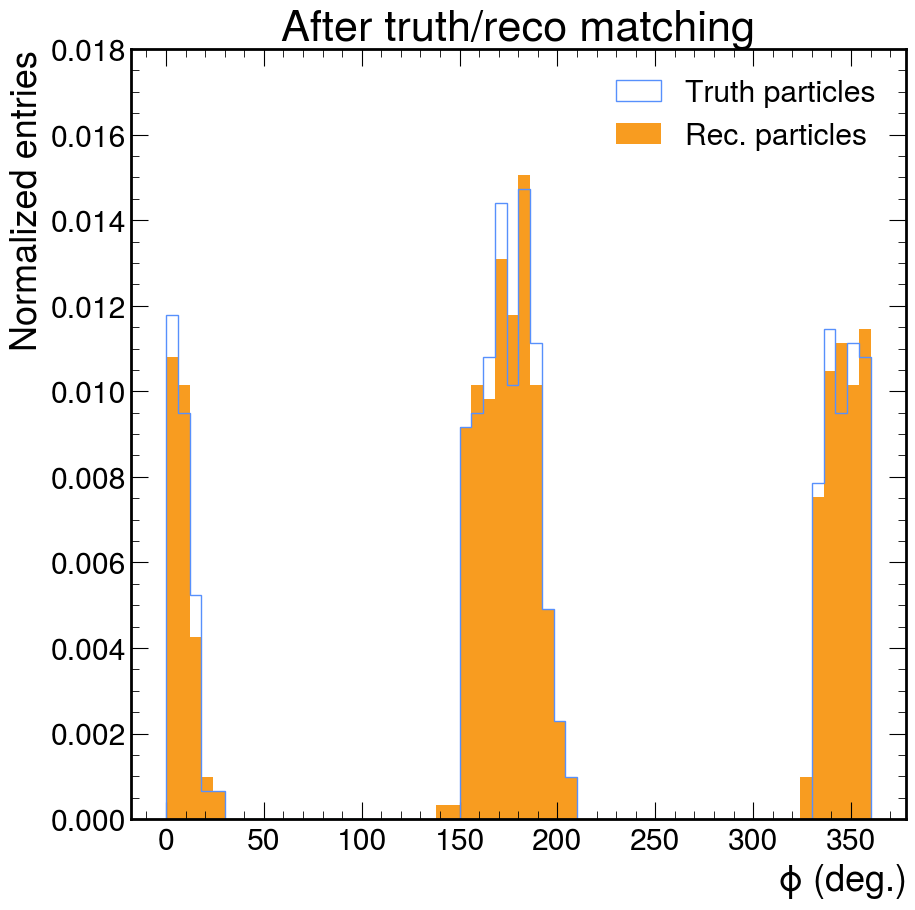

In [39]:
fig = plt.figure()
plt.hist(
    ak.flatten(matching_truth_particles["MC::Particle.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(matching_rec_particles["REC::Particles.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("$\phi$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After truth/reco matching")
plt.ylim(0, .018)

(0.0, 0.018)

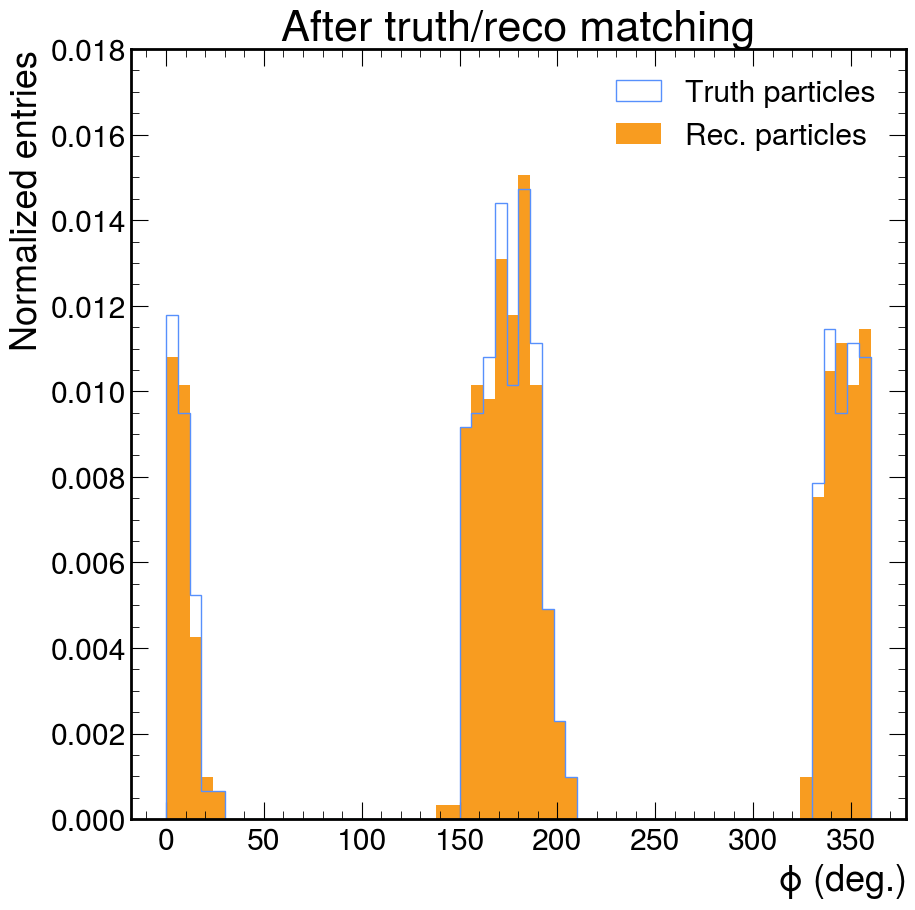

In [40]:
fig = plt.figure()
plt.hist(
    ak.flatten(matching_truth_particles["MC::Particle.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(matching_rec_particles["REC::Particles.phi"]),
    bins = 60,
    range = (0, 360),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("$\phi$ (deg.)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After truth/reco matching")
plt.ylim(0, .018)

Text(0.5, 1.0, 'After truth/reco matching')

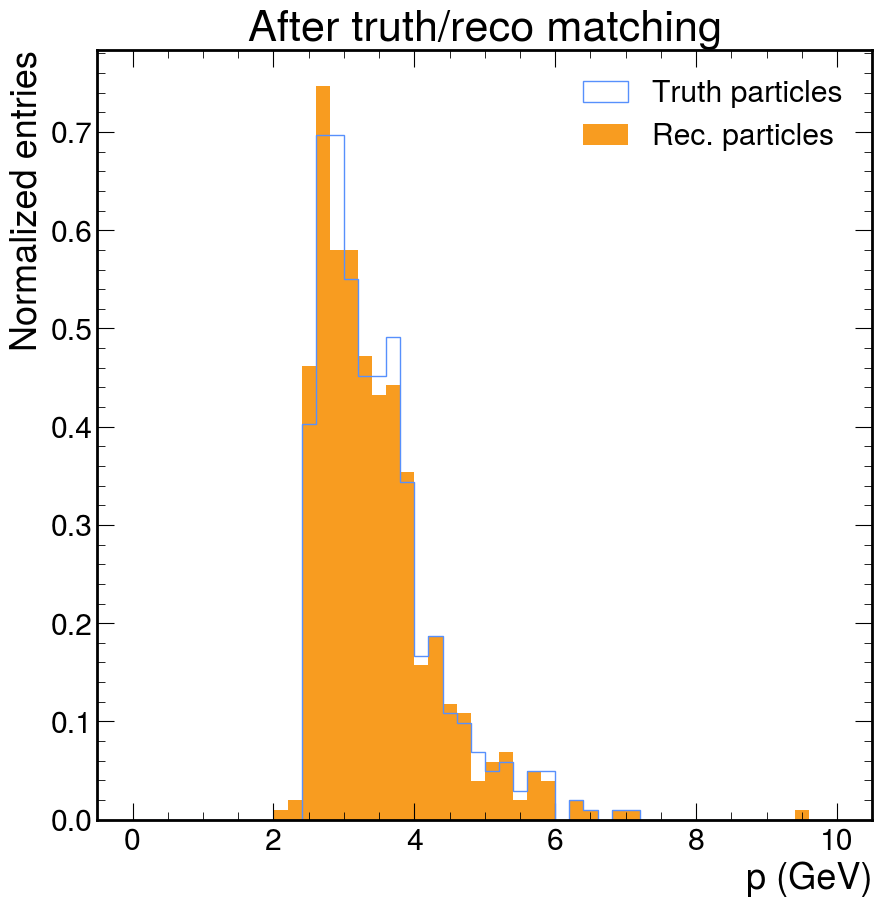

In [41]:
fig = plt.figure()
plt.hist(
    ak.flatten(matching_truth_particles["MC::Particle.p"]),
    bins = 50,
    range = (0, 10),
    label = "Truth particles",
    histtype='step',
    density=True
)

plt.hist(
    ak.flatten(matching_rec_particles["REC::Particles.p"]),
    bins = 50,
    range = (0, 10),
    label = "Rec. particles",
    histtype='stepfilled',
    density=True
)
plt.xlabel("p (GeV)")
plt.ylabel("Normalized entries")
plt.legend()
plt.title("After truth/reco matching")
# plt.ylim(0, .018)